<a href="https://colab.research.google.com/github/Debojyoti83/Jamboree-Education---Linear-Regression/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Jamboree Education - Linear Regression**

#**Context:**
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

#**Problem Statment:**
Jamboree wants to know what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

#**Column Profiling:**
- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

#**Loading The Dataset :**

In [ ]:
! gdown 1L_4gnksU3vUimHFQIx_kX-VavZOz4PqC

Downloading...
From: https://drive.google.com/uc?id=1L_4gnksU3vUimHFQIx_kX-VavZOz4PqC
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 21.2MB/s]


In [ ]:
df = pd.read_csv("/content/Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
print('Rows:', df.shape[0],'\n' 'Columns: ',df.shape[1])

Rows: 500 
Columns:  9


# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


* **There are no missing values present in the dataset.**


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

* **There are a spsce in end of the two column name 'LOR' and 'Chance of Admit', let's correct this.**

In [ ]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)
df.rename(columns = {'LOR ':'LOR'}, inplace = True)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#**Checking for Missing Values & Duplicate Values**

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

* **There are no missing values and duplicate values also.**

**Dropping unique row identifier 'Serial No.' column because its not required for our analysis.**

In [ ]:
df.drop('Serial No.', axis = 1, inplace = True)

#**Univariate Analysis**

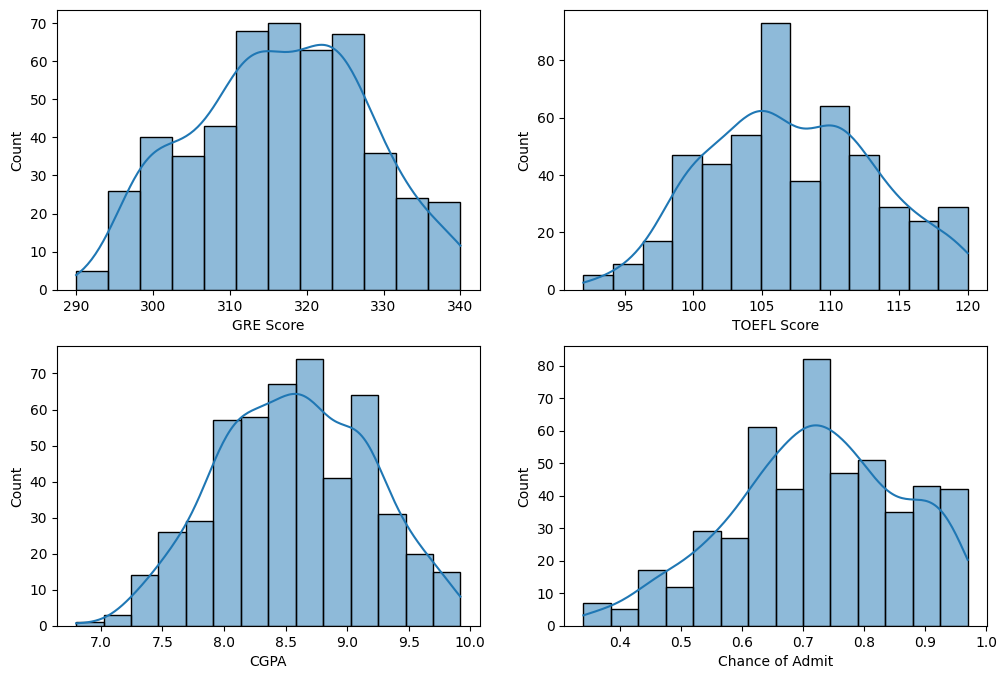

In [ ]:
# check distribution of each numerical variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break

sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(df[target], kde=True, ax=axs[1,1])
plt.show()

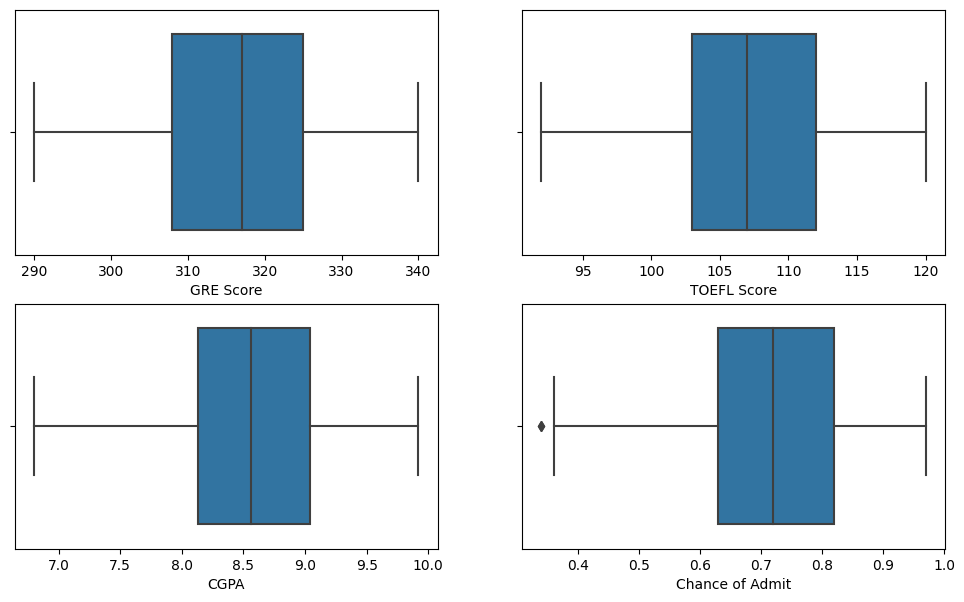

In [ ]:
# check for outliers using boxplots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
    index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target, data=df, ax=axs[1,1])
plt.show()

**Almost no outliers found in the given data.**

In [ ]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column:  {:18}   Unique values: {}".format(col, df[col].nunique()))

Column:  University Rating    Unique values: 5
Column:  SOP                  Unique values: 9
Column:  LOR                  Unique values: 9
Column:  Research             Unique values: 2


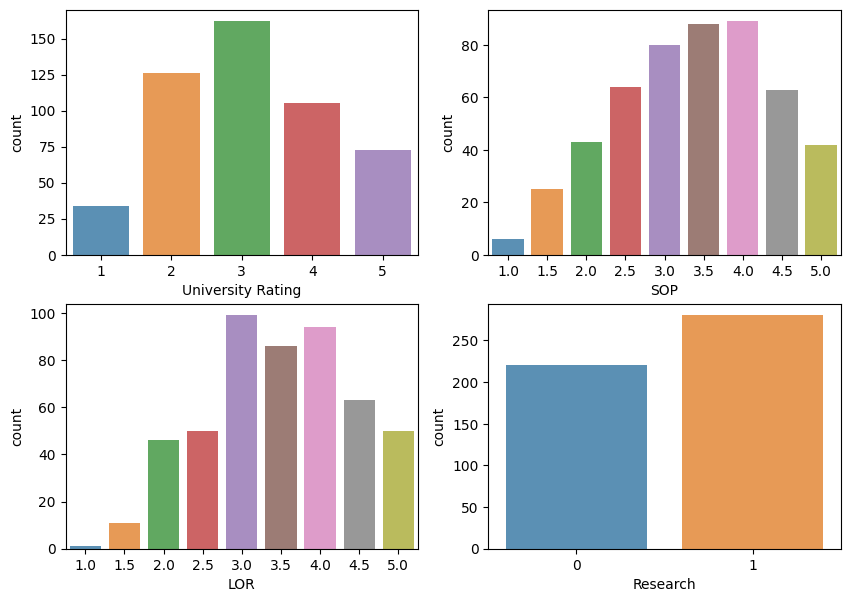

In [ ]:
# countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1

plt.show()

## Bivariate Analysis

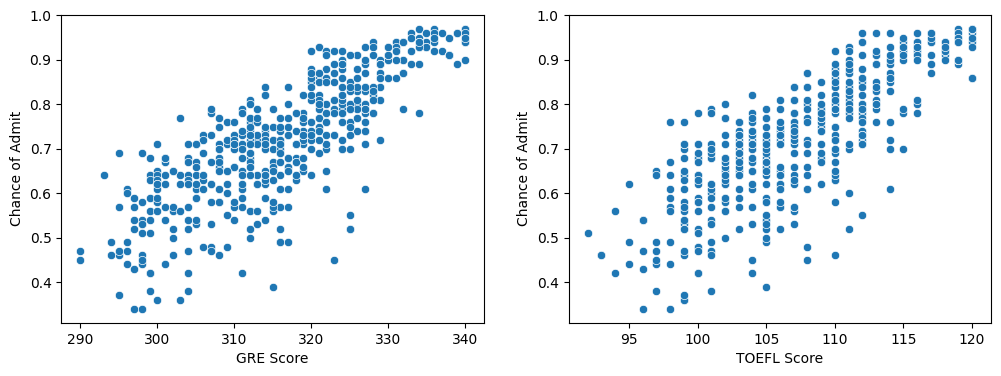

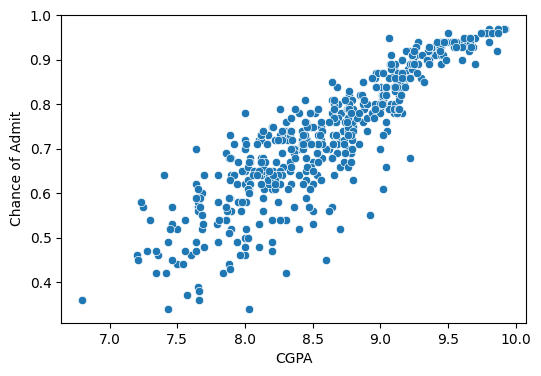

In [ ]:
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,4))

sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

* **We can see an almost linear relationship between target and independent variables.**
* **Higher the continuos independent values, higher is the chance of admit.**

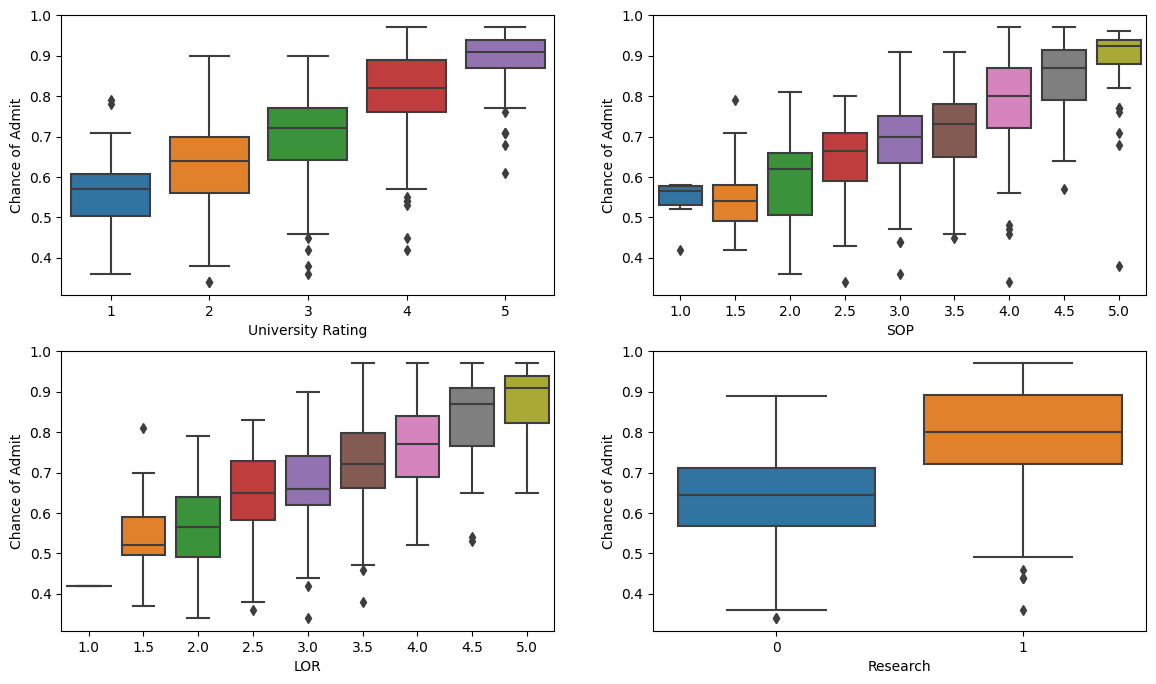

In [ ]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(14,8))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1

* **As you can see from the graphs, as the rating increases the `Chance of Admit also increases.**
* **Students who have the research experience have more chances of Admin as compared to other students who don't have the research experience.**

## Multivariate Analysis

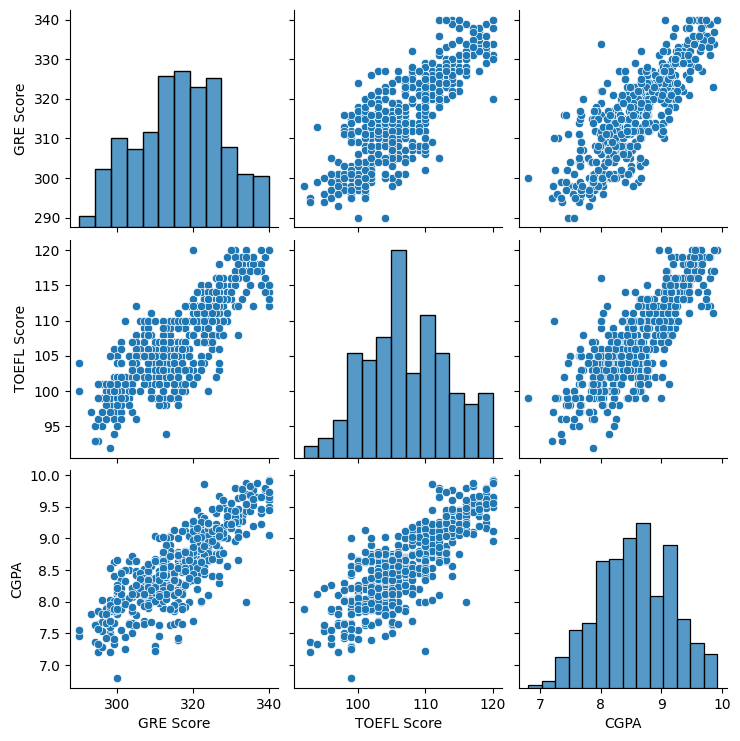

In [ ]:
sns.pairplot(df[num_cols])
plt.show()

* **Independent continuous variables are also correlated with each other.**

In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


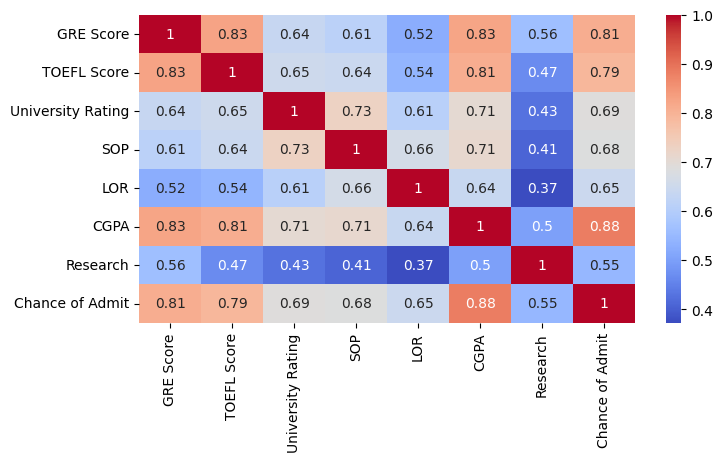

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

* **Highest correlation with chance of admit is observed in CGPA.**
* **Higher correlation observed between CGPA vs TOEFL Score, CGPA vs GRE score and TOEFL vs GRE.**

# **Data preparation for  model building**

**Scaling the data & Splitting the data_frame to get training and test sets**

In [ ]:
# standardize the dataset
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [ ]:
X = data.drop(columns=[target])
Y = data[target]

In [ ]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [ ]:
Y.head()

0    1.406107
1    0.271349
2   -0.012340
3    0.555039
4   -0.508797
Name: Chance of Admit, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
Y_train.head()

471   -0.579720
26     0.271349
7     -0.296030
453    0.058582
108    1.477030
Name: Chance of Admit, dtype: float64

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(335, 7) (335,)
(165, 7) (165,)


# **Model Building**

In [ ]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)

    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [ ]:
def train_model(X_train, Y_train, X_test, Y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(Y_train, y_pred_train, p)
    test_res = get_metrics(Y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

In [ ]:
train_model(X_train, Y_train, X_test, Y_test,df.columns[:-1], "linear")
train_model(X_train, Y_train, X_test, Y_test,df.columns[:-1], "ridge")
train_model(X_train, Y_train, X_test, Y_test,df.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.3 Test MAE: 0.31
Train RMSE: 0.42 Test RMSE: 0.43
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.81 Test Adjusted_R2: 0.82
Intercept: 0.014112411712080955
              Column      Coef
0          GRE Score  0.170760
1        TOEFL Score  0.139031
2  University Rating  0.024694
3                SOP  0.011343
4                LOR  0.102266
5               CGPA  0.515190
6           Research  0.058882
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.3 Test MAE: 0.31
Train RMSE: 0.42 Test RMSE: 0.43
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.81 Test Adjusted_R2: 0.82
Intercept: 0.014131392076210433
              Column      Coef
0          GRE Score  0.172332
1        TOEFL Score  0.139970
2  University Rating  0.025689
3                SOP  0.012752
4                LOR  0.102667
5               CGPA  0.509445
6           Research  0.059015
----------

Lasso(alpha=0.001)

- **Since model is not overfitting, Results for Linear, Ridge and Lasso are the same.**
- **R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data**

# **Linear Regression Using Stats model Library**

* **R-squared reflects the fit of the model. R-squared values range from 0-1, where the higher value indicates the better fit of the model.**
* **std error reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.**
* **P > |t| is the P-Value, a p-value of less than 0.05 is considered to be statistically significant.**
* **Confidence Interval represents the range in which out coefficients are likely to fall.**

In [ ]:
X_train = sm.add_constant(X_train)
sm_model = sm.OLS(Y_train.values,X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          5.89e-117
Time:                        08:40:35   Log-Likelihood:                -186.30
No. Observations:                 335   AIC:                             388.6
Df Residuals:                     327   BIC:                             419.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0141      0.02

# **Linear Regression Model - Assumption Test**

* **Mutlicollinearity Check:**

In [ ]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

In [ ]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [ ]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


In [ ]:
# # drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [ ]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [ ]:
# lets drop the LOR as well
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR'], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [ ]:
# drop the University Rating
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


In [ ]:
# now again train the model with these only two features
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
model = train_model(X_train, Y_train, X_test, Y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, Y_train, X_test, Y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, Y_train, X_test, Y_test, ['CGPA', 'Research'], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.34 Test MAE: 0.31
Train RMSE: 0.46 Test RMSE: 0.45
Train R2_score: 0.79 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.01599413787625033
     Column      Coef
0      CGPA  0.817332
1  Research  0.134408
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.34 Test MAE: 0.31
Train RMSE: 0.46 Test RMSE: 0.45
Train R2_score: 0.79 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.015987959682908857
     Column      Coef
0      CGPA  0.814436
1  Research  0.135401
--------------------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.34 Test MAE: 0.31
Train RMSE: 0.46 Test RMSE: 0.45
Train R2_score: 0.79 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.015997879572428503
     Column      Coef
0      CGPA  0.816635
1  Research  0.133739
----------------------------------

Lasso(alpha=0.001)

* **After removing collinear features using VIF and using only two features,
 R2_score and Adjusted_r2 are still the same as before the testing dataset.**

***Mean of Residuals :**
* **It is clear from RMSE that Mean of Residuals is almost zero.**

**Linearity of variables :**

* **It is quite clear from EDA that independent variables are linearly dependent on the target variables.**

# **Normality of Residuals**

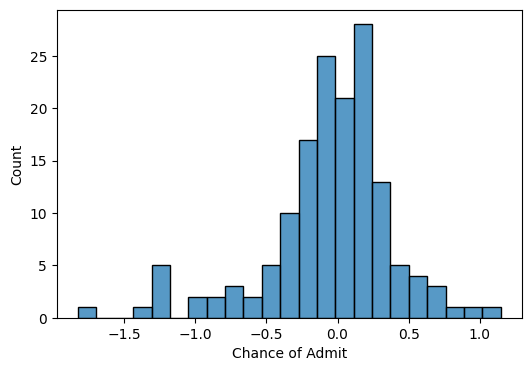

In [ ]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
y_pred = model.predict(X_test)
residuals = (Y_test - y_pred)
sns.histplot(residuals)
plt.show()

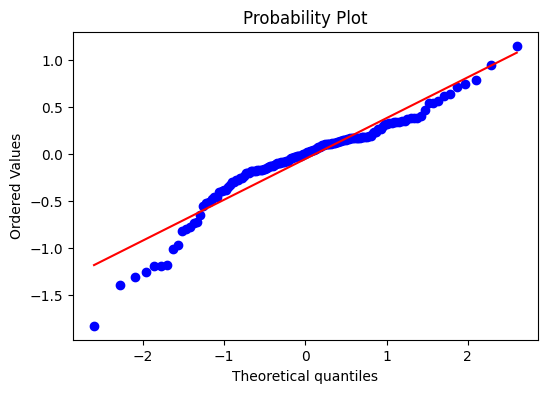

In [ ]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
stats.probplot(residuals, plot=plt)
plt.show()

# **Test for Homoscedasticity**

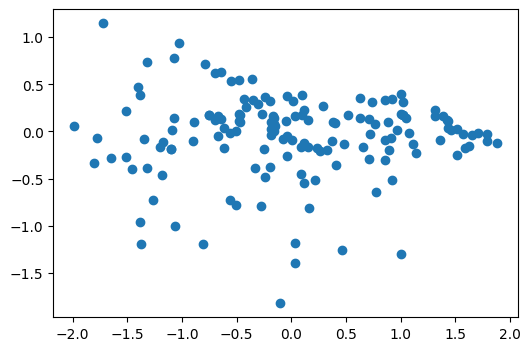

In [ ]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
plt.scatter(y_pred, residuals)
plt.show()

**Since the plot is not creating a cone type shape. Hence there is no homoscedasticity present in the data.**

# **Insights:**

1. Multicollinearity is present in the data.
2. After removing collinear features there are only two variables which are important in making predictions for the target variables.
3. Indepedent variables are linearly correlated with dependent variables.

# **Recommendations:**
1. `CGPA and Research` are the only two variables which are important in making the prediction for `Chance of Admit`.
2. `CGPA` is the most important varibale in making the prediction for the `Chance of Admit`.
3. Following are the final model results on the test data:
    - **RMSE:** 0.45
    - **MAE:** 0.31
    - **R2_score:** 0.81
    - **Adjusted_R2:** 0.81